In [1]:
from brian2 import *
%matplotlib inline
import sys
sys.path.append('./resonnant')
import resonnant as rs
reload(rs)

WARNING    /Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
 [py.warnings]


<module 'resonnant' from './resonnant/resonnant.pyc'>

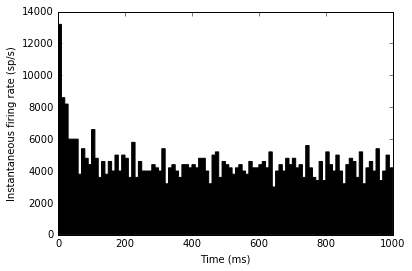

In [2]:
start_scope()

N = 50
tau = 10*ms
vr = -70*mV
vt0 = -50*mV
delta_vt0 = 5*mV
tau_t = 100*ms
sigma = 0.5*(vt0-vr)
v_drive = 2*(vt0-vr)
duration = 1000*ms

eqs = '''
dv/dt = (v_drive+vr-v)/tau + sigma*xi*tau**-0.5 : volt
dvt/dt = (vt0-vt)/tau_t : volt
'''

reset = '''
v = vr
vt += delta_vt0
'''

G = NeuronGroup(N, eqs, threshold='v>vt', reset=reset, refractory=5*ms, method='euler')
spikemon = SpikeMonitor(G)

G.v = 'rand()*(vt0-vr)+vr'
G.vt = vt0

run(duration)

_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', weights=ones(len(spikemon))/(N*defaultclock.dt))
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');

# Test brian2ephys

In [3]:
# Build brianResults dict
brianTri = [spikemon, spikemon]
stims = ['teststim', 'teststim']
trialLen = 1.0
iti = 5.0
fs = 20000

brianResults = {'brianTrials': brianTri, 'stims': stims, 'trialLen': trialLen, 'nClusters': N, 'iti': iti, 'fs': fs}
ephysDict = rs.brian2ephys(brianResults)

# Test ephys2binned

In [4]:
windt = 25.0
period = {'period': 1}
ncellsperm = 20
nperms = 30
nshuffs = 1 
blockPath = './'


binParams = {'windt': windt, 'period': period, 'ncellsperm': ncellsperm,
             'nperms': nperms, 'nshuffs': nshuffs, 'blockPath': blockPath}

In [ ]:
bfdict = rs.ephys2binned(ephysDict, binParams)

# Test brian2SimplicialComplex

In [5]:
thresh = 0

sclist = rs.brian2SimplicialComplex(brianResults, binParams, thresh)

  0%|          | 0/20 [00:00<?, ?it/s]

Building simplex..


KeyboardInterrupt: 